<a href="https://colab.research.google.com/github/springboardmentor74280b-design/Habitability-of-Exoplanets/blob/ChandraShekar/Habitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Habitability of Exoplanets Using Machine Learning**

**Importing all required packages**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/exoplanets.csv')

Reading top 5 rows in the dataset.

In [3]:
data.head()

,Name,Mass (MJ),Radius (RJ),Period (days),Semi-major axis (AU),Temp. (K),Discovery method,Disc. Year,Distance (ly),Host star mass (M☉),Host star temp. (K),Remarks
0,16 Cygni Bb,2.38,NaN,799.5,1.66,NaN,radial vel.,1996.0,68.99,1.04,5750,NaN
1,23 Librae b,1.61,NaN,258.18,0.81,NaN,radial vel.,1999.0,85.46,1.07,5736,NaN
2,47 Ursae Majoris b,2.53,NaN,1078,2.1,NaN,radial vel.,1996.0,45.02,1.08,5892,Proper name Taphao Thong
3,51 Pegasi b,0.46,NaN,4.230785,0.0527,NaN,radial vel.,1995.0,50.45,1.12,5793,Proper name Dimidium; previously informally na...
4,55 Cancri b,0.8306,NaN,14.65152,0.115227,700,radial vel.,1996.0,41.06,0.905,5196,Proper name Galileo


## Identify Missing Values


In [4]:
missing_values = data.isnull().sum()

In [5]:
percentage_missing = (data.isnull().sum() / len(data)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': percentage_missing
})

print("Missing Values Information:")
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Percentage', ascending=False))


Missing Values Information:
                      Missing Count  Percentage
Disc. Year                     4444   91.534501
Temp. (K)                      3761   77.466529
Mass (MJ)                      2560   52.729145
Semi-major axis (AU)           1707   35.159629
Radius (RJ)                    1155   23.789907
Host star mass (M☉)             380    7.826982
Remarks                         353    7.270855
Host star temp. (K)             342    7.044284
Period (days)                   218    4.490216
Distance (ly)                   149    3.069001


In [7]:
descriptive_stats = data.describe()
print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats)

Descriptive Statistics for Numerical Columns:
        Disc. Year
count  4855.000000
mean   2005.941916
std       1.074829
min    1988.000000
25%    2006.000000
50%    2006.000000
75%    2006.000000
max    2009.000000


## Impute Numerical Missing Values

In [ ]:
numerical_cols_with_missing = data.select_dtypes(include=['number']).columns

for col in numerical_cols_with_missing:
    if data[col].isnull().any():
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in column '{col}' with median: {median_val}")

print("\nMissing values after imputation:")
print(data[numerical_cols_with_missing].isnull().sum())

Filled missing values in column 'Disc. Year' with median: 2006.0

Missing values after imputation:
Disc. Year    0
dtype: int64


/tmp/ipython-input-2433999253.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)


In [6]:
numerical_cols_with_missing = data.select_dtypes(include=['number']).columns

for col in numerical_cols_with_missing:
    if data[col].isnull().any():
        median_val = data[col].median()
        data[col] = data[col].fillna(median_val)
        print(f"Filled missing values in column '{col}' with median: {median_val}")

print("\nMissing values after imputation:")
print(data[numerical_cols_with_missing].isnull().sum())

Filled missing values in column 'Disc. Year' with median: 2006.0

Missing values after imputation:
Disc. Year    0
dtype: int64


In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns

for col in numerical_cols:
    if data[col].isnull().any():
        median_val = data[col].median()
        data[col] = data[col].fillna(median_val)
        print(f"Filled missing values in column '{col}' with median: {median_val}")

print("\nMissing values after imputation:")
print(data.isnull().sum()[data.isnull().sum() > 0])


Missing values after imputation:
Mass (MJ)               2560
Radius (RJ)             1155
Period (days)            218
Semi-major axis (AU)    1707
Temp. (K)               3761
Distance (ly)            149
Host star mass (M☉)      380
Host star temp. (K)      342
Remarks                  353
dtype: int64


In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns
print(f"Numerical columns identified for imputation: {list(numerical_cols)}")

for col in numerical_cols:
    if data[col].isnull().any():
        print(f"\nProcessing column: '{col}' (missing values found)")
        median_val = data[col].median()
        data[col] = data[col].fillna(median_val)
        print(f"Filled missing values in column '{col}' with median: {median_val}")
    else:
        # This else branch is mainly for debugging to confirm all numerical columns are checked
        print(f"\nColumn: '{col}' has no missing values.")

print("\nMissing values after full numerical imputation:")
# Print only columns that still have missing values, numerical or otherwise
print(data.isnull().sum()[data.isnull().sum() > 0])


Numerical columns identified for imputation: ['Disc. Year']

Column: 'Disc. Year' has no missing values.

Missing values after full numerical imputation:
Mass (MJ)               2560
Radius (RJ)             1155
Period (days)            218
Semi-major axis (AU)    1707
Temp. (K)               3761
Distance (ly)            149
Host star mass (M☉)      380
Host star temp. (K)      342
Remarks                  353
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  4855 non-null   object 
 1   Mass (MJ)             2295 non-null   object 
 2   Radius (RJ)           3700 non-null   object 
 3   Period (days)         4637 non-null   object 
 4   Semi-major axis (AU)  3148 non-null   object 
 5   Temp. (K)             1094 non-null   object 
 6   Discovery method      4855 non-null   object 
 7   Disc. Year            4855 non-null   float64
 8   Distance (ly)         4706 non-null   object 
 9   Host star mass (M☉)   4475 non-null   object 
 10  Host star temp. (K)   4513 non-null   object 
 11  Remarks               4502 non-null   object 
dtypes: float64(1), object(11)
memory usage: 455.3+ KB
None


In [ ]:
cols_to_convert = [
    'Mass (MJ)', 'Radius (RJ)', 'Period (days)', 'Semi-major axis (AU)',
    'Temp. (K)', 'Distance (ly)', 'Host star mass (M☉)', 'Host star temp. (K)'
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    print(f"Converted column '{col}' to numeric type.")

print("\nData types after conversion:")
print(data[cols_to_convert].dtypes)


Converted column 'Mass (MJ)' to numeric type.
Converted column 'Radius (RJ)' to numeric type.
Converted column 'Period (days)' to numeric type.
Converted column 'Semi-major axis (AU)' to numeric type.
Converted column 'Temp. (K)' to numeric type.
Converted column 'Distance (ly)' to numeric type.
Converted column 'Host star mass (M☉)' to numeric type.
Converted column 'Host star temp. (K)' to numeric type.

Data types after conversion:
Mass (MJ)               float64
Radius (RJ)             float64
Period (days)           float64
Semi-major axis (AU)    float64
Temp. (K)               float64
Distance (ly)           float64
Host star mass (M☉)     float64
Host star temp. (K)     float64
dtype: object


In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns
print(f"Numerical columns identified for imputation: {list(numerical_cols)}")

for col in numerical_cols:
    if data[col].isnull().any():
        print(f"\nProcessing column: '{col}' (missing values found)")
        median_val = data[col].median()
        data[col] = data[col].fillna(median_val)
        print(f"Filled missing values in column '{col}' with median: {median_val}")
    else:
        print(f"\nColumn: '{col}' has no missing values.")

print("\nMissing values after full numerical imputation:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Numerical columns identified for imputation: ['Mass (MJ)', 'Radius (RJ)', 'Period (days)', 'Semi-major axis (AU)', 'Temp. (K)', 'Disc. Year', 'Distance (ly)', 'Host star mass (M☉)', 'Host star temp. (K)']

Processing column: 'Mass (MJ)' (missing values found)
Filled missing values in column 'Mass (MJ)' with median: 0.89

Processing column: 'Radius (RJ)' (missing values found)
Filled missing values in column 'Radius (RJ)' with median: 0.207

Processing column: 'Period (days)' (missing values found)
Filled missing values in column 'Period (days)' with median: 11.829851

Processing column: 'Semi-major axis (AU)' (missing values found)
Filled missing values in column 'Semi-major axis (AU)' with median: 0.117

Processing column: 'Temp. (K)' (missing values found)
Filled missing values in column 'Temp. (K)' with median: 1093.7

Column: 'Disc. Year' has no missing values.

Processing column: 'Distance (ly)' (missing values found)
Filled missing values in column 'Distance (ly)' with median: 13

## Drop Irrelevant Columns


In [ ]:
columns_to_drop = ['Name', 'Remarks']
data = data.drop(columns=columns_to_drop)

print(f"Columns '{columns_to_drop[0]}' and '{columns_to_drop[1]}' have been removed.")
print("Remaining columns in the DataFrame:")
print(data.columns)

Columns 'Name' and 'Remarks' have been removed.
Remaining columns in the DataFrame:
Index(['Mass (MJ)', 'Radius (RJ)', 'Period (days)', 'Semi-major axis (AU)',
       'Temp. (K)', 'Discovery method', 'Disc. Year', 'Distance (ly)',
       'Host star mass (M☉)', 'Host star temp. (K)'],
      dtype='object')


## Encode Categorical Features

In [ ]:
discovery_method_encoded = pd.get_dummies(data['Discovery method'], prefix='Discovery_method', drop_first=True)
data = pd.concat([data, discovery_method_encoded], axis=1)
data = data.drop('Discovery method', axis=1)

print("First 5 rows of the DataFrame after one-hot encoding:")
print(data.head())
print("\nUpdated columns in the DataFrame:")
print(data.columns)

First 5 rows of the DataFrame after one-hot encoding:
   Mass (MJ)  Radius (RJ)  Period (days)  Semi-major axis (AU)  Temp. (K)  \
0     2.3800        0.207     799.500000              1.660000     1093.7   
1     1.6100        0.207     258.180000              0.810000     1093.7   
2     2.5300        0.207    1078.000000              2.100000     1093.7   
3     0.4600        0.207       4.230785              0.052700     1093.7   
4     0.8306        0.207      14.651520              0.115227      700.0   

   Disc. Year  Distance (ly)  Host star mass (M☉)  Host star temp. (K)  \
0      1996.0          68.99                1.040               5750.0   
1      1999.0          85.46                1.070               5736.0   
2      1996.0          45.02                1.080               5892.0   
3      1995.0          50.45                1.120               5793.0   
4      1996.0          41.06                0.905               5196.0   

   Discovery_method_imaging  Discovery

In [ ]:
descriptive_stats = data.describe()
print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats)

Descriptive Statistics for Numerical Columns:
         Mass (MJ)  Radius (RJ)  Period (days)  Semi-major axis (AU)  \
count  4855.000000  4855.000000   4.855000e+03           4855.000000   
mean      1.406609     0.306409   8.418826e+04              6.446042   
std       2.717668     0.342157   5.741638e+06            132.446324   
min       0.000063     0.029000   9.070629e-02              0.004400   
25%       0.890000     0.183000   5.868387e+00              0.117000   
50%       0.890000     0.207000   1.182985e+01              0.117000   
75%       0.890000     0.232000   2.590364e+01              0.117000   
max      59.200000     6.900000   4.000000e+08           6900.000000   

         Temp. (K)   Disc. Year  Distance (ly)  Host star mass (M☉)  \
count  4855.000000  4855.000000    4855.000000          4855.000000   
mean   1099.259574  2005.941916    1741.029945             0.989733   
std     218.221290     1.074829    2296.995376             0.541287   
min      50.000000  1

Generating histograms for numerical columns...


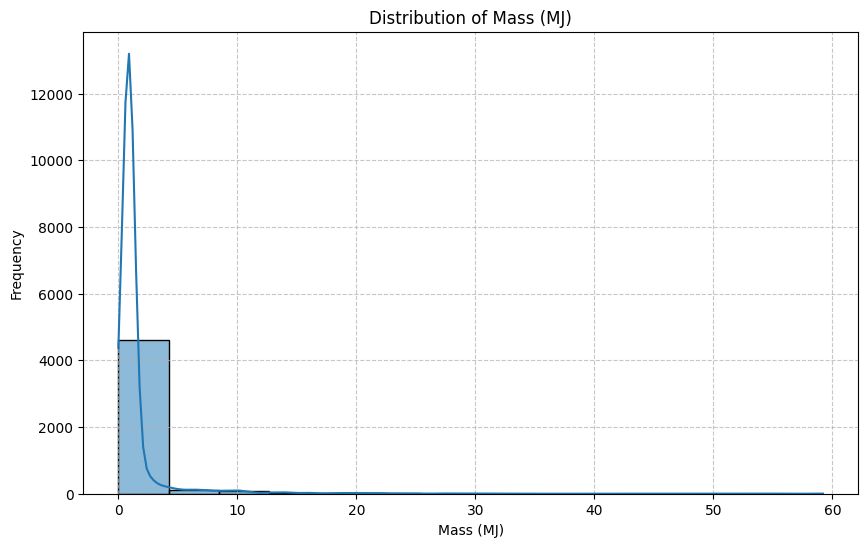

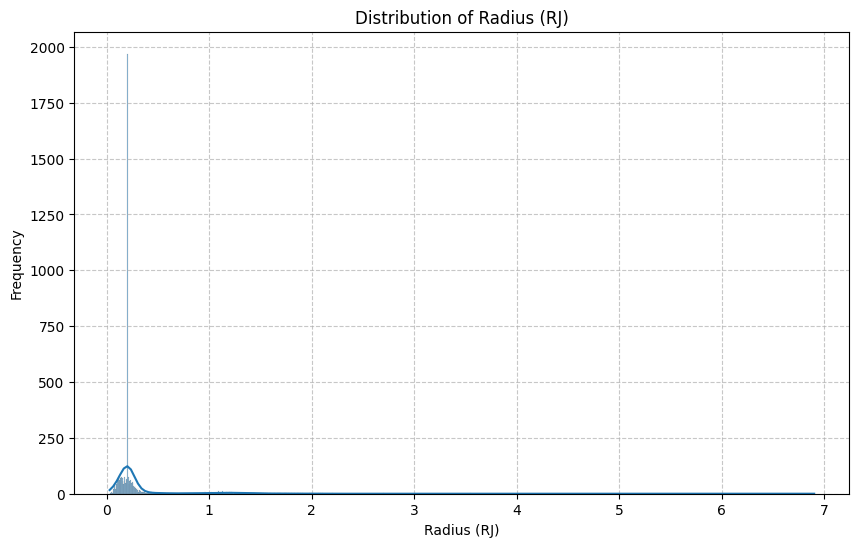

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data.select_dtypes(include=['number']).columns

print("Generating histograms for numerical columns...")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

print("Histograms generated successfully.")

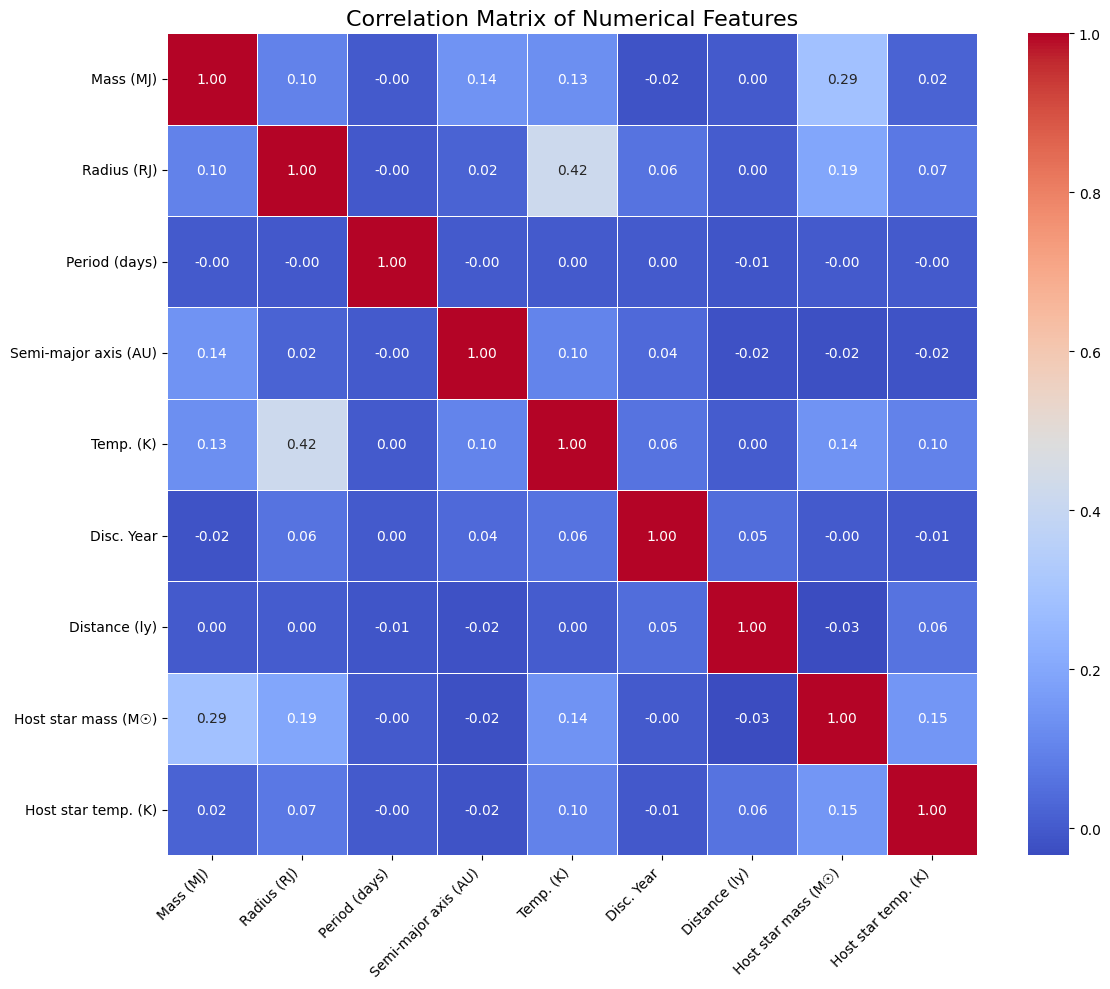

Correlation matrix heatmap generated successfully.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-reading the data and applying all preprocessing steps to define 'data'
data = pd.read_csv('/content/exoplanets.csv')

# --- Type conversion for numerical columns (from cell acf67b62) ---
cols_to_convert = [
    'Mass (MJ)', 'Radius (RJ)', 'Period (days)', 'Semi-major axis (AU)',
    'Temp. (K)', 'Distance (ly)', 'Host star mass (M☉)', 'Host star temp. (K)'
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# --- Numerical Imputation (from cell 6d66842c) ---
numerical_cols_for_imputation = data.select_dtypes(include=['number']).columns

for col in numerical_cols_for_imputation:
    if data[col].isnull().any():
        median_val = data[col].median()
        data[col] = data[col].fillna(median_val)

# --- Dropping irrelevant columns (from cell 9b3130ad) ---
columns_to_drop = ['Name', 'Remarks']
data = data.drop(columns=columns_to_drop)

# --- One-hot encoding (from cell 690ca864) ---
discovery_method_encoded = pd.get_dummies(data['Discovery method'], prefix='Discovery_method', drop_first=True)
data = pd.concat([data, discovery_method_encoded], axis=1)
data = data.drop('Discovery method', axis=1)

# --- Original code for correlation matrix ---
numerical_cols = data.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Correlation matrix heatmap generated successfully.")